In [1]:
!pip install dask_ml['complete']
!pip install dask['complete']

INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.8/149.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.2
    Uninstalling xgboost-2.1.2:
      Successfully uninstalled xgboost-2.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.3 MB/s eta 0:0

In [2]:
import pandas as pd
import numpy as np
import dask.dataframe as dd # Dask = computacion distribuida y calc. paralelizados entre nucleos

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#SETUP SEABORN
# Configurar las opciones predeterminadas de Seaborn
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# También puedes personalizar más detalles como las fuentes, el tamaño de la figura, etc.
sns.set_context("notebook")  # Ajusta el contexto (puede ser 'paper', 'talk', 'notebook', 'poster')

# Si deseas más personalización:
sns.set_palette("deep")  # Establece una paleta de colores predeterminada
sns.set_style("ticks")  # Para tener los bordes en lugar de las cuadrículas (o "whitegrid", "darkgrid", "white", "dark")

# Ahora puedes usarlo para cualquier gráfico
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [4]:


# Paso 1: Leer una muestra del archivo con pandas
train_sample_df = pd.read_csv('train (2).csv', nrows=500)
test_sample_df = pd.read_csv('test (2).csv', nrows=500)

# Paso 2: Inferir tipos de datos con pandas # ESQUEMA GENERAL
train_inferred_dtypes = train_sample_df.dtypes.to_dict()
test_inferred_dtypes = test_sample_df.dtypes.to_dict()

# Modificar tipos problemáticos (si es necesario, según errores específicos)
# Por ejemplo, convertir objetos mixtos en 'object' explícito
for column, dtype in train_inferred_dtypes.items():
    if dtype.name == 'object':
        train_inferred_dtypes[column] = 'object'

for column, dtype in test_inferred_dtypes.items():
    if dtype.name == 'object':
        test_inferred_dtypes[column] = 'object'

# Paso 3: Usar los dtypes inferidos al cargar el archivo con Dask
train_dd = dd.read_csv('train (2).csv', dtype=train_inferred_dtypes)
test_dd = dd.read_csv('test (2).csv', dtype=test_inferred_dtypes)


In [5]:
# train_dd.compute().info() # test_dd.compute().info()

train_dd.isnull().mean().compute().sort_values(ascending = False).head(10)

,0
Study Satisfaction,0.801727
Academic Pressure,0.801727
CGPA,0.801720
Profession,0.260341
Work Pressure,0.198422
Job Satisfaction,0.198365
Dietary Habits,0.000028
Financial Stress,0.000028
Degree,0.000014
Family History of Mental Illness,0.000000


In [6]:
train_dd.compute()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [7]:
test_dd.compute()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
93797,234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


In [8]:
# drop "Name" # it is a un-important feature
train_dd.describe().compute()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [9]:
# DISTRIBUTION of target variable
train_dd['Depression'].value_counts(normalize=True).compute() # percent

,proportion
Depression,
0,0.818287
1,0.181713


In [10]:
train_dd['Depression'].isnull().sum().compute()

0

In [11]:
# pop with "drop" -> depression col.

y = train_dd.pop('Depression')

In [12]:
# drop ID col. and name col.
# "ya que son columnas que no me dan informacion util para mi modelo. y pueden entorpecer a un arbol de deciciones"
train_dd=train_dd.drop('Name',axis=1)
test_dd=test_dd.drop('Name',axis=1)

In [13]:
train_dd=train_dd.set_index('id')
test_dd=test_dd.set_index('id')

In [14]:
test_dd.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,
140700,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
140701,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
140702,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
140703,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
140704,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [15]:
display(train_dd.compute().info())
# Configura temporalmente la opción para mostrar todas las columnas solo para este resultado
display(train_dd.describe(include='all').compute())

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  object 
 1   Age                                    140700 non-null  float64
 2   City                                   140700 non-null  object 
 3   Working Professional or Student        140700 non-null  object 
 4   Profession                             104070 non-null  object 
 5   Academic Pressure                      27897 non-null   float64
 6   Work Pressure                          112782 non-null  float64
 7   CGPA                                   27898 non-null   float64
 8   Study Satisfaction                     27897 non-null   float64
 9   Job Satisfaction                       112790 non-null  float64
 10  Sleep Duration                         140700 non-null  objec

None

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
unique,2,NaN,98,2,64,NaN,NaN,NaN,NaN,NaN,36,23,115,2,NaN,NaN,2
count,140700,140700.000000,140700,140700,104070,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700,140696,140698,140700,140700.000000,140696.000000,140700
top,Male,NaN,Kalyan,Working Professional,Teacher,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Moderate,Class 12,No,NaN,NaN,No
freq,77464,NaN,6591,112799,24906,NaN,NaN,NaN,NaN,NaN,38784,49705,14729,71138,NaN,NaN,70758
mean,NaN,40.388621,NaN,NaN,NaN,3.142273,2.998998,7.658636,2.944940,2.974404,NaN,NaN,NaN,NaN,6.252679,2.988983,NaN
std,NaN,12.384099,NaN,NaN,NaN,1.380457,1.405771,1.464466,1.360197,1.416078,NaN,NaN,NaN,NaN,3.853615,1.413633,NaN
min,NaN,18.000000,NaN,NaN,NaN,1.000000,1.000000,5.030000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN
25%,NaN,29.000000,NaN,NaN,NaN,2.000000,2.000000,6.290000,2.000000,2.000000,NaN,NaN,NaN,NaN,3.000000,2.000000,NaN
50%,NaN,42.000000,NaN,NaN,NaN,3.000000,3.000000,7.770000,3.000000,3.000000,NaN,NaN,NaN,NaN,6.000000,3.000000,NaN
75%,NaN,51.000000,NaN,NaN,NaN,4.000000,4.000000,8.920000,4.000000,4.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN


### esquematizacion de datos optima:

Si sabes que los valores de una columna no serán negativos y se encuentran dentro del rango de 0 a 65535, usar uint16 puede ahorrar memoria en comparación con el tipo de datos int64 o int32, que ocupan más espacio.

* uint8: Age, Academic Pressure, Work Pressure, Study Satisfaction, Job Satisfaction, Work/Study Hours, Financial Stress
* float16: CGPA,





![image.png](attachment:b13aa9d6-69ff-48c6-8eeb-81d2d0316bc8.png)

----


cuadro sobre los tipos de datos y sus recomendaciones para optimizar el almacenamiento y la eficiencia en cálculos, incluyendo el uso de `float16`, `uint8`, y otros tipos relevantes:

| **Tipo de Datos**       | **Condición / Caso de Uso**                                                                                       | **Recomendación**                                                         |
|-------------------------|-------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Enteros (int)**        | Valores no negativos, dentro de 0 a 255                                                                            | Usar `uint8` para ahorrar espacio.                                        |
| **Enteros (int)**        | Valores no negativos, dentro de 0 a 65,535                                                                         | Usar `uint16` en lugar de `int32` o `int64` para ahorrar memoria.        |
| **Enteros (int)**        | Valores negativos y positivos, rango moderado (por ejemplo, entre -2,147,483,648 y 2,147,483,647)                  | Usar `int32` o `int64` según el tamaño del rango.                         |
| **Flotantes (float)**    | Precisión baja, rango limitado de valores, por ejemplo, entre -1.0 y 1.0                                          | Usar `float16` para ahorrar memoria en lugar de `float32`.                |
| **Flotantes (float)**    | Precisión suficiente con 7 dígitos decimales (usualmente)                                                           | Usar `float32` en lugar de `float64` para ahorrar memoria y mantener precisión. |
| **Flotantes (float)**    | Alta precisión requerida, hasta 15 dígitos decimales                                                                 | Usar `float64` para mantener la precisión.                               |
| **Cadenas (str)**        | Texto corto y repetitivo (por ejemplo, categorías con pocos valores únicos)                                         | Usar `category` para optimizar el espacio de memoria.                     |
| **Cadenas (str)**        | Texto largo y variado (por ejemplo, descripciones)                                                                   | Usar `string` o `object`, dependiendo de la variabilidad del texto.       |
| **Fechas (datetime)**    | Fechas con tiempo asociado, datos temporales                                                                          | Usar `datetime64[ns]` para fechas completas o `datetime64[D]` para solo fechas. |
| **Fechas (datetime)**    | Fechas sin necesidad de almacenar fracciones de segundo                                                              | Usar `datetime64[D]` para optimizar memoria, sin perder precisión.      |
| **Booleanos**            | Valores `True` o `False`                                                                                             | Usar `bool` para ahorrar espacio en lugar de `int` o `object`.            |
| **Datos dispersos**      | Muchos valores cero (por ejemplo, matrices de datos dispersos)                                                       | Usar `Sparse` para almacenar solo los valores no nulos, ahorrando memoria. |
| **Columnas con NaN**     | Datos con muchos valores nulos                                                                                      | Usar tipos `nullable` como `Int64`, `Float32` o `string`, para ahorrar espacio al manejar `NaN`. |
| **Valores de bajo rango**| Columnas con valores en un rango específico (por ejemplo, 0 a 10)                                                    | Usar tipos de datos como `int8`, `uint8`, `float16` según el rango para minimizar el uso de memoria. |

### Detalles adicionales:

- **`float16`**: Utiliza la mitad de memoria que `float32` y es útil cuando la precisión no es crítica (por ejemplo, imágenes, valores con pocos decimales).
- **`uint8` y `uint16`**: Útiles para datos enteros pequeños (valores no negativos), como colores de imágenes o datos de clasificación con rangos limitados.
- **`category`**: Es excelente para columnas con un número reducido de categorías, ya que almacena cada valor como un código entero que se refiere a una categoría interna.
- **`datetime64[ns]`**: Almacena fechas y horas con una precisión de nanosegundos, lo cual es adecuado para la mayoría de los datos temporales. Puedes usar `datetime64[D]` si solo te interesan las fechas sin horas.

cuadro  más completo, abarcando un rango más amplio de tipos de datos y sus recomendaciones de uso para lograr una optimización más eficiente del espacio de memoria y rendimiento en el procesamiento de datos.

Optimizar esquemas de datos puede ser una práctica esencial en el diseño y la gestión de bases de datos, así como en el manejo de grandes volúmenes de datos. Aquí te explico **en qué puede servir** y por qué es importante:

### 1. **Mejorar el rendimiento de las consultas**
   - **Reducción de la complejidad de las consultas**: Si un esquema de datos está bien optimizado, las consultas serán más rápidas. Por ejemplo, utilizando índices adecuados, claves foráneas bien definidas y un buen diseño de tablas, se pueden realizar búsquedas y uniones más rápidas.
   - **Reducción de las operaciones costosas**: Si las relaciones entre tablas son bien estructuradas, se minimizan las operaciones de *join* complejas, lo que reduce el tiempo de procesamiento de las consultas.

### 2. **Reducción del uso de memoria**
   - **Tipos de datos adecuados**: Al elegir los tipos de datos correctos (por ejemplo, usar `int16` en lugar de `int32` cuando los valores son pequeños), puedes ahorrar espacio en memoria.
   - **Eliminación de datos redundantes**: Un buen esquema de datos elimina la duplicación de información y reduce la cantidad de espacio que se necesita para almacenar datos innecesarios.

### 3. **Facilitar el mantenimiento y escalabilidad**
   - **Estructura más flexible**: Los esquemas de datos optimizados son más fáciles de mantener. Si necesitas agregar nuevas columnas, tablas o relaciones, la estructura debería ser tal que puedas hacerlo sin complicaciones ni afectar el rendimiento general.
   - **Escalabilidad**: A medida que aumente la cantidad de datos, un esquema de datos optimizado puede escalar de manera más eficiente sin perder rendimiento. Esto es particularmente útil en bases de datos distribuidas y en sistemas que manejan grandes volúmenes de datos (como sistemas de Big Data).

### 4. **Mejorar la integridad de los datos**
   - **Reglas de validación y restricciones**: Un buen diseño de esquema de datos puede garantizar que los datos sean coherentes y validos. Esto incluye la utilización de restricciones de integridad referencial (como claves primarias y foráneas), reglas de validación y desencadenadores de integridad (triggers).
   - **Evitación de anomalías**: Un esquema bien diseñado evita problemas como la redundancia de datos (por ejemplo, duplicar direcciones de usuario en múltiples tablas) y las inconsistencias en los datos.

### 5. **Facilitar la implementación de la lógica de negocio**
   - **Representación de relaciones complejas**: Los esquemas de datos optimizados pueden reflejar de manera más eficiente las relaciones complejas entre los objetos del negocio. Esto puede incluir la normalización adecuada de datos para representar correctamente las relaciones entre las entidades.
   - **Soporte para análisis**: Un esquema bien estructurado facilita el análisis de los datos, por ejemplo, al permitir la creación eficiente de vistas y consultas complejas para informes y análisis.

### 6. **Optimización para el rendimiento en sistemas distribuidos**
   - Si estás trabajando con bases de datos distribuidas (como en sistemas NoSQL o en grandes clústeres de bases de datos), un esquema optimizado puede mejorar la distribución de datos entre nodos, lo que reduce la latencia y mejora la disponibilidad.

### Ejemplo práctico: Optimización en un sistema de bases de datos relacional
Supongamos que tienes una base de datos de ventas con múltiples tablas: clientes, productos, transacciones, etc. Aquí hay algunas optimizaciones que podrían hacerse:

- **Normalización**: Asegurarte de que las tablas están normalizadas hasta un nivel adecuado (por ejemplo, hasta la tercera forma normal). Esto elimina redundancias como almacenar la misma información del cliente en varias tablas.
- **Índices**: Crear índices en columnas que se consultan frecuentemente, como los `ID` de clientes o productos, para acelerar las búsquedas y uniones de tablas.
- **Particionamiento de tablas**: Si tienes grandes volúmenes de datos, podrías dividir las tablas en particiones (por ejemplo, particionando transacciones por año) para mejorar el rendimiento de las consultas.
- **Uso eficiente de claves primarias y foráneas**: Asegurarte de que todas las tablas tengan claves primarias únicas y claves foráneas correctas para mantener la integridad referencial.

### 7. **Casos de uso en Big Data y Machine Learning**
   - En entornos de **Big Data**, como en bases de datos distribuidas o en sistemas de procesamiento de datos en tiempo real, un esquema de datos bien optimizado permite manejar grandes volúmenes de datos con eficiencia, evitando cuellos de botella y mejorando la latencia de las consultas.
   - En **Machine Learning**, los esquemas optimizados son fundamentales para la creación de pipelines de datos eficientes, asegurando que los datos se almacenen de manera que puedan ser fácilmente preprocesados y utilizados para entrenar modelos.

### 8. **Compatibilidad y portabilidad**
   - Un diseño adecuado de los esquemas asegura que la base de datos sea más fácilmente portable entre diferentes plataformas. Por ejemplo, usar tipos de datos estándar y evitar dependencias específicas de una base de datos puede facilitar la migración a otros sistemas.

### Conclusión
Optimizar esquemas de datos es crucial para mejorar el rendimiento, reducir costos de almacenamiento, garantizar la integridad de los datos y facilitar el mantenimiento a largo plazo. Esta práctica beneficia a sistemas tanto pequeños como grandes y es clave en aplicaciones de alto rendimiento, como bases de datos distribuidas y sistemas de procesamiento de datos masivos.

# Concatenate df's

In [16]:
df = dd.concat([train_dd, test_dd],axis = 0)
df.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes


# Optimizacion de esquema de datos previo a la imputación.

In [17]:
import dask.dataframe as dd
import pandas as pd

# uint8: Age, Academic Pressure, Work Pressure, Study Satisfaction, Job Satisfaction, Work/Study Hours, Financial Stress
# float16: CGPA,

# Definir el esquema optimizado para las columnas
dtypes = {
    'Age': np.float16,  # O 'float16' si la precisión lo permite
    'Academic Pressure': np.float16,
    'Work Pressure': np.float16,
    'Study Satisfaction': np.float16,
    'Job Satisfaction': np.float16,
    'Work/Study Hours': np.float16,
    'Financial Stress': np.float16,
    'CGPA': np.float16
}

# Cambiar los tipos de datos de las columnas según el esquema
for column, dtype in dtypes.items():
    df[column] = df[column].astype(dtype)


In [18]:
df.info()

<class 'dask_expr.DataFrame'>
Columns: 17 entries, Gender to Family History of Mental Illness
dtypes: float16(8), string(9)

In [19]:
train_dd.columns

Index(['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')

## Categorical and numerical, list of columns

In [20]:
categorical = [var for var in train_dd.columns if train_dd[var].dtype == 'string']

# LISTA DE VARIABLES NUMERICAS
numerical = [var for var in train_dd.columns if train_dd[var].dtype != 'string']


## Seaborn Graphic Analisis

In [21]:
# df[numerical].head()
# Seaborn graphic analisis
df_pd = pd.read_csv("train (2).csv", index_col = 'id', nrows=15000) # muestra de "x" filas a fin de graficar

In [22]:
df_pd.head(3)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [23]:
# Calcular la cardinalidad de cada columna categórica
cardinalities = {col: df_pd[col].nunique() for col in categorical}

# Mostrar los resultados
display(cardinalities)

{'Gender': 2,
 'City': 37,
 'Working Professional or Student': 2,
 'Profession': 43,
 'Sleep Duration': 8,
 'Dietary Habits': 5,
 'Degree': 36,
 'Have you ever had suicidal thoughts ?': 2,
 'Family History of Mental Illness': 2}

# Graphs

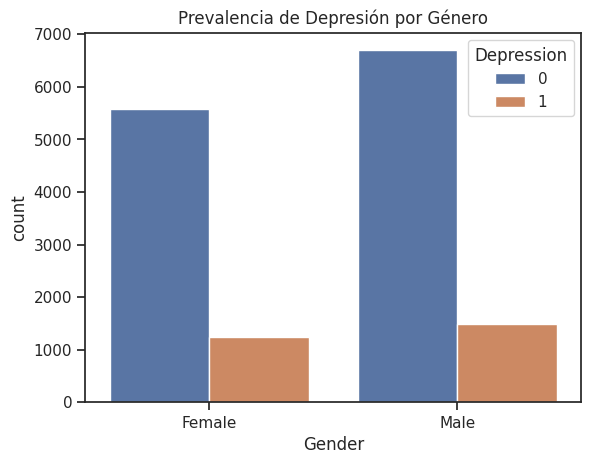

In [24]:
sns.countplot(x='Gender', hue='Depression', data=df_pd)
plt.title('Prevalencia de Depresión por Género')
plt.show()

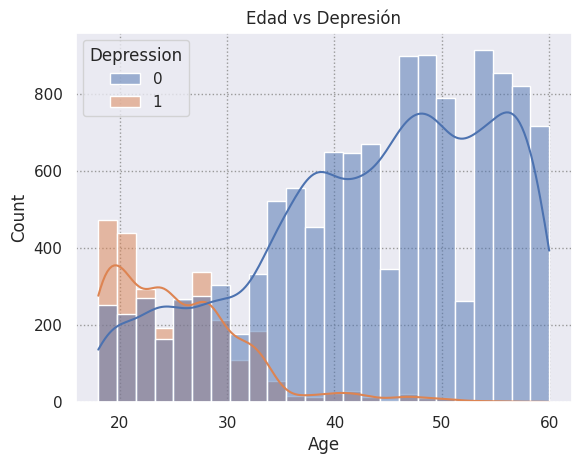

In [25]:
# young people == high prob. to suffer depression
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.histplot(x='Age', hue='Depression', data=df_pd, kde = True)
plt.title('Edad vs Depresión')
plt.show()

# We will be useful for characteristic engineering, we will discretize "AGE" in two parts, young people vs. old

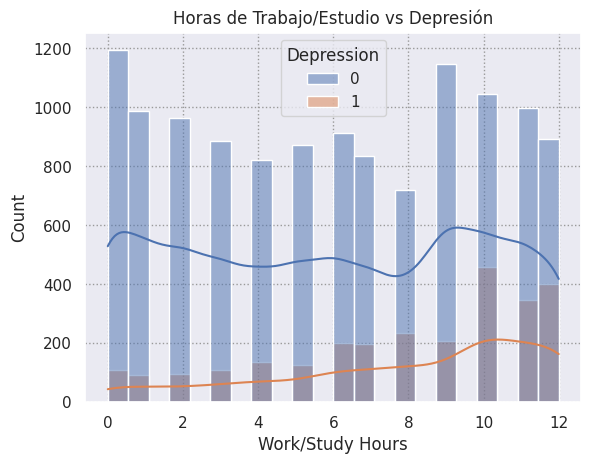

In [26]:
sns.histplot(x='Work/Study Hours', hue='Depression', data=df_pd, kde = True)
plt.title('Horas de Trabajo/Estudio vs Depresión')
plt.show()

# Obviously the worst load the "mental respite"

#### Heatmap: Correlation matrix

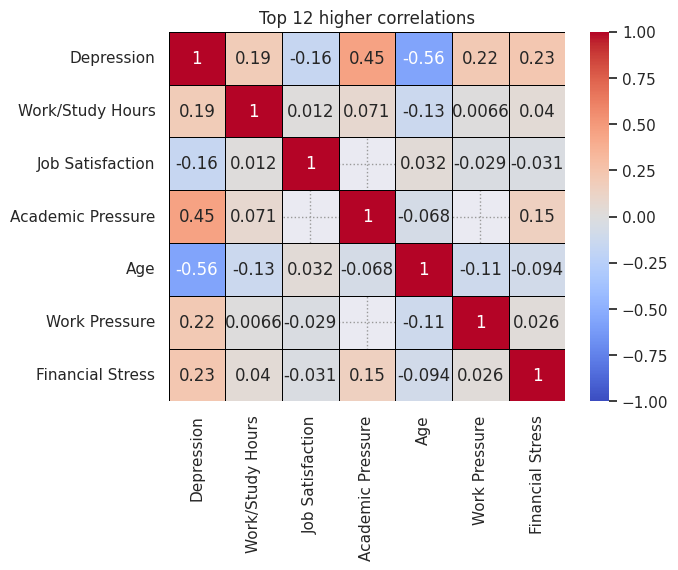

In [27]:
numerical_pd = [var for var in df_pd.columns if df_pd[var].dtype != 'O']

# Calcular la matriz de correlación
corr_matrix = df_pd[numerical_pd].corr()

# Encontrar las 12 correlaciones más altas
# Primero, apilamos la matriz para obtener una lista de pares de correlaciones
corr_pairs = corr_matrix.abs().unstack()

# Eliminar las correlaciones entre la misma columna
corr_pairs = corr_pairs[corr_pairs != 1]

# Seleccionar las 12 correlaciones más altas
top_12_corr = corr_pairs.nlargest(12)

# Extraer las columnas correspondientes a estas correlaciones
# Tomar solo las columnas involucradas en las correlaciones más altas
top_12_cols = set()
for pair in top_12_corr.index:
    top_12_cols.update(pair)

top_12_cols = list(top_12_cols)

# Crear la matriz de correlación para estas 12 columnas
top_12_corr_matrix = corr_matrix.loc[top_12_cols, top_12_cols]

# Crear el heatmap
sns.heatmap(top_12_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidth=.5, linecolor = 'black')

# Mostrar el gráfico
plt.title('Top 12 higher correlations')
plt.show()


#### Age is fundamental
#### The academic pressure is the variable that is second most corelated to depression
#### Work pressure and financial pressure are also very important

### -- Estudiando sesgos (Skewness)


In [28]:
# Cálculo de sesgo
skewness = df_pd[numerical_pd].skew()

# Imprimir los sesgos
print(skewness)

Age                  -0.218312
Academic Pressure    -0.151321
Work Pressure         0.020304
CGPA                 -0.117854
Study Satisfaction    0.044723
Job Satisfaction      0.052731
Work/Study Hours     -0.134666
Financial Stress      0.041621
Depression            1.654896
dtype: float64


### -- Detectar valores atípicos (Outliers)


In [29]:
from scipy.stats import zscore

# Calcular Z-scores
z_scores = df_pd[numerical_pd].apply(zscore)

# Filtrar outliers (Z-score > 3 o < -3)
outliers = (z_scores.abs() > 3)
outliers_df_pd = df_pd[outliers.any(axis=1)]

print(outliers_df_pd)


Empty DataFrame
Columns: [Name, Gender, Age, City, Working Professional or Student, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression]
Index: []


In [30]:
### IQR (Interquartile Range):

# Calcular el IQR
Q1 = df_pd[numerical_pd].quantile(0.25)
Q3 = df_pd[numerical_pd].quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
outliers_IQR = ((df_pd[numerical_pd] < (Q1 - 1.5 * IQR)) | (df_pd[numerical_pd] > (Q3 + 1.5 * IQR)))
outliers_IQR_df = df_pd[outliers_IQR.any(axis=1)]

display(outliers_IQR_df)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
15,Aditi,Female,23.0,Patna,Working Professional,Marketing Manager,NaN,2.0,NaN,NaN,2.0,5-6 hours,Healthy,MA,Yes,6.0,4.0,Yes,1
27,Aarav,Male,50.0,Ghaziabad,Working Professional,HR Manager,NaN,5.0,NaN,NaN,3.0,Less than 5 hours,Healthy,MA,Yes,12.0,5.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,Aakash,Male,18.0,Nagpur,Student,NaN,1.0,NaN,7.94,4.0,NaN,Less than 5 hours,Moderate,Class 12,Yes,6.0,4.0,No,1
14994,Lata,Female,34.0,Hyderabad,Student,NaN,3.0,NaN,8.94,2.0,NaN,5-6 hours,Healthy,MCA,Yes,12.0,5.0,No,1
14995,Vibha,Female,38.0,Chennai,Working Professional,NaN,NaN,3.0,NaN,NaN,3.0,7-8 hours,Unhealthy,Class 12,Yes,9.0,1.0,Yes,1


----

## Data Preprocess.

In [44]:
from dask_ml.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(
    # X, y, random_state=0, test_size=0.2
# )
# import dask.dataframe as dd
# import dask_ml.preprocessing as dpp
from sklearn.pipeline import Pipeline
from dask_ml.compose import ColumnTransformer

#IMPUTERS and preprocessing
from dask_ml.impute import SimpleImputer
# from dask_ml.preprocessing import OrdinalEncoder
# from dask_ml.preprocessing import LabelEncoder
from dask_ml import preprocessing
from dask_ml.preprocessing import StandardScaler, OneHotEncoder

#MODELS
from dask_ml.xgboost import XGBClassifier
from dask_ml.linear_model import LogisticRegression
from dask_ml.naive_bayes import GaussianNB

In [32]:
df

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
npartitions=2,,,,,,,,,,,,,,,,,
,string,float16,string,string,string,float16,float16,float16,float16,float16,string,string,string,string,float16,float16,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [33]:
# # Dividimos los datos en entrenamiento y prueba
# from dask_ml.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, )

### imputation

In [34]:
# estimators = [('num_imp', SimpleImpute(strategy='median', ))]
# imputation = Pipeline(estimators)

# buscmaos primero la mejor imputacion posibble

# Imputación para columnas numéricas
num_imputer = SimpleImputer(strategy='median')
df[numerical] = num_imputer.fit_transform(df[numerical])

# Imputación y codificación para columnas categóricas
cat_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
df[categorical] = cat_imputer.fit_transform(df[categorical])

# encoder = OrdinalEncoder()
# df[categorical] = encoder.fit_transform(df[categorical])

display(df.head())

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,
0,Female,49.0,Ludhiana,Working Professional,Chef,3.0,5.0,7.800781,3.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No
1,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,7.800781,3.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No
2,Male,33.0,Visakhapatnam,Student,Missing,5.0,3.0,8.968750,2.0,3.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
3,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,7.800781,3.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes
4,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,7.800781,3.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes


In [35]:
df.compute().shape

(234500, 17)

In [42]:
df.npartitions

2

# Tras imputacion: Optimizamos aun mas el esquema tabular de los datos

In [39]:
# # Definir el esquema optimizado para las columnas
# dtypes = {
#     'Age': np.uint8,  # O 'float16' si la precisión lo permite
#     'Academic Pressure': np.uint8,
#     'Work Pressure': np.uint8,
#     'Study Satisfaction': np.uint8,
#     'Job Satisfaction': np.uint8,
#     'Work/Study Hours': np.uint8,
#     'Financial Stress': np.uint8,
#     'CGPA': np.float16
# }

# # Cambiar los tipos de datos de las columnas según el esquema
# for column, dtype in dtypes.items():
#     df[column] = df[column].astype(dtype)

hoa


-----